# <span style='color:orange'> Machine Learning Course Project <span>

## <span style='color:green'> Using Encoder part of Auto-Encoder as Feature Extracter <span>

**Description**: The notebook uses the pre-trained autoencoder generated by TrainAE notebook to create the encoder only model. The encoder model is then used as a feature extractor to extract descriptive features from each MRI scan of a patient. <br>
**Team:** Unlearners

In [1]:
import dataloader as dl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = '/home/asa224/Desktop/students_less_asa224/BRATS2017/MICCAI_BraTS17_Data_Training/HGG/'
images = dl.loadData(data_dir, loadFromDump=False, loadStandardized=False, saveDump=False, verbose=1)

[WARNING] The loader DOES NOT STANDARDIZE DATA, NEITHER IT WRITES STANDARDIZED DATA TO DISK
It can only load standardized data from disk..


Loading images...
Currently on patient 1


/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/2.7.13-SYSTEM/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Currently on patient 2
Currently on patient 3
Currently on patient 4
Currently on patient 5
Currently on patient 6
Currently on patient 7
Currently on patient 8
Currently on patient 9
Currently on patient 10
Currently on patient 11
Currently on patient 12
Currently on patient 13
Currently on patient 14
Currently on patient 15
Currently on patient 16
Currently on patient 17
Currently on patient 18
Currently on patient 19
Currently on patient 20
Currently on patient 21
Currently on patient 22
Currently on patient 23
Currently on patient 24
Currently on patient 25
Currently on patient 26
Currently on patient 27
Currently on patient 28
Currently on patient 29
Currently on patient 30
Currently on patient 31
Currently on patient 32
Currently on patient 33
Currently on patient 34
Currently on patient 35
Currently on patient 36
Currently on patient 37
Currently on patient 38
Currently on patient 39
Currently on patient 40
Currently on patient 41
Currently on patient 42
Currently on patient 43


In [3]:
images = dl.standardize(images)

Calculating mean value..
Calculating standard deviation..
Starting standardization process..
Data standardized!
Done!


## Reshape the training matrix

**A Neural Network requires data to be in a specific shape. Currently we have the following shape: (210, 4, 120, 120, 155). We would like to reshape it in such a way that all images come together, ie. concatenate all images together and lose the information about individual patients, hence the shape should be: (210*155, 4, 120, 120) -> (32550, 120, 120, 4). To do this, we first need to swap the sequence axis and num_slices axis, and then perform reshaping**

We have to be extra careful here, as swapping and reshaping nd-arrays can lead to undesirable results. 

In [4]:
images.shape

(210, 4, 120, 120, 155)

In [5]:
images_rs = np.swapaxes(images, 1, 4)

In [6]:
images_rs.shape

(210, 155, 120, 120, 4)

In [7]:
images_rs = images_rs.reshape(-1, images_rs.shape[2], images_rs.shape[3], images_rs.shape[4])

In [8]:
images_rs.shape

(32550, 120, 120, 4)

**To determine whether shape changing was successful, we visualize the data**

In [ ]:
# for i in range(0, 155, 10):
#     plt.imshow(images_rs[i, :, :, 1], cmap='gray')
#     plt.show()

** Shape changing was successfull and it behaved in a way that was required and expected.**

## Load the Pretrained Autoencoder Model

In [9]:
from keras.models import Model, load_model

Using TensorFlow backend.


In [10]:
autoencoder = load_model('./AE_30.h5')

In [11]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 120, 120, 4)       0         
_________________________________________________________________
Conv_e_1_1 (Conv2D)          (None, 120, 120, 64)      2368      
_________________________________________________________________
Conv_e_1_2 (Conv2D)          (None, 120, 120, 64)      36928     
_________________________________________________________________
Pool_e_1 (MaxPooling2D)      (None, 60, 60, 64)        0         
_________________________________________________________________
Conv_e_2_1 (Conv2D)          (None, 60, 60, 32)        18464     
_________________________________________________________________
Conv_e_2_2 (Conv2D)          (None, 60, 60, 32)        9248      
_________________________________________________________________
Pool_e_2 (MaxPooling2D)      (None, 30, 30, 32)        0         
__________

**We generate the _encoder_ model by slicing the main autoencoder model from input until the middle layer (named "feature"). We do this by using the Model() function.**

In [12]:
encoder = Model(input=autoencoder.input, output=autoencoder.get_layer('feature').output)

/grad/3/asa224/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("fe..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [13]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 120, 120, 4)       0         
_________________________________________________________________
Conv_e_1_1 (Conv2D)          (None, 120, 120, 64)      2368      
_________________________________________________________________
Conv_e_1_2 (Conv2D)          (None, 120, 120, 64)      36928     
_________________________________________________________________
Pool_e_1 (MaxPooling2D)      (None, 60, 60, 64)        0         
_________________________________________________________________
Conv_e_2_1 (Conv2D)          (None, 60, 60, 32)        18464     
_________________________________________________________________
Conv_e_2_2 (Conv2D)          (None, 60, 60, 32)        9248      
_________________________________________________________________
Pool_e_2 (MaxPooling2D)      (None, 30, 30, 32)        0         
__________

## Visualize how our autoencoder is doing as a sanity check to confirm that the loaded pretrained model is correct.

In [15]:
print('Decoding images...')
decoded_imgs = autoencoder.predict(images_rs)
print('Decoding done!')

Decoding images...
Decoding done!


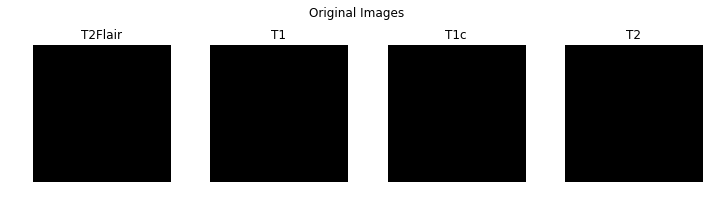

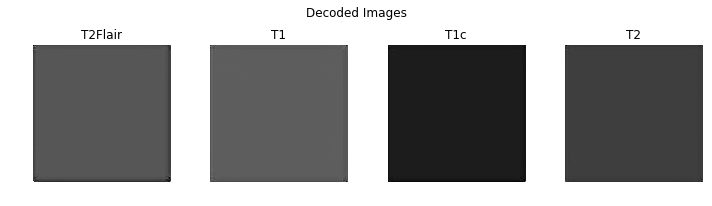

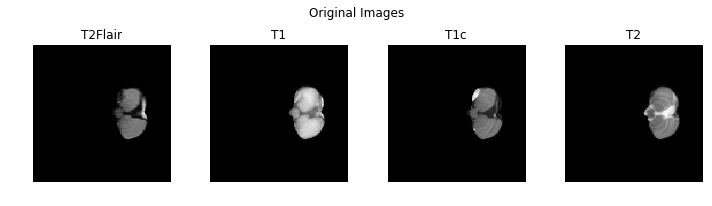

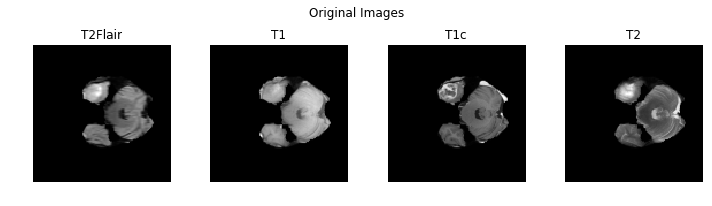

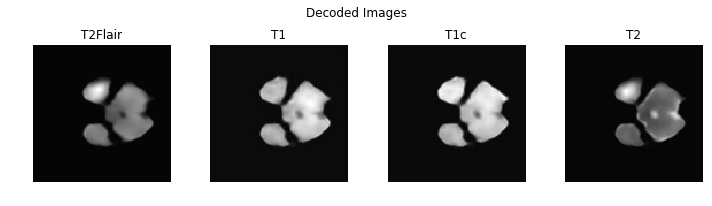

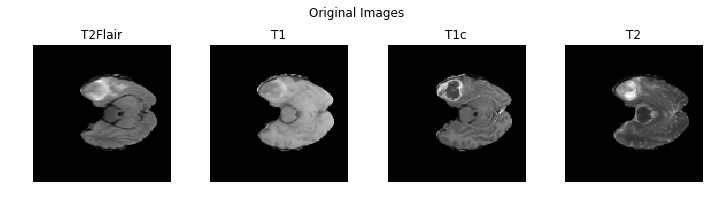

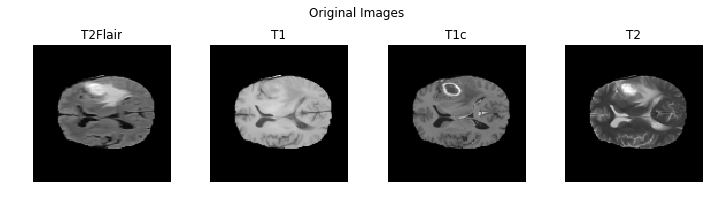

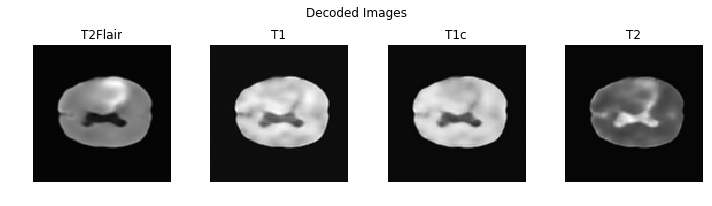

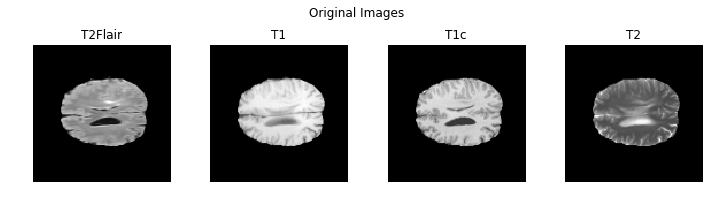

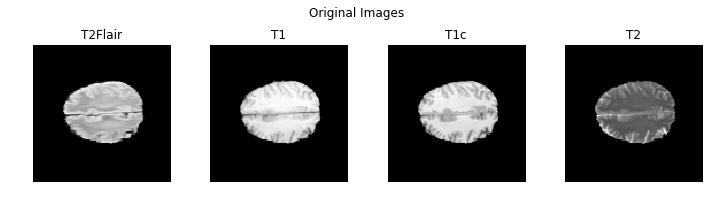

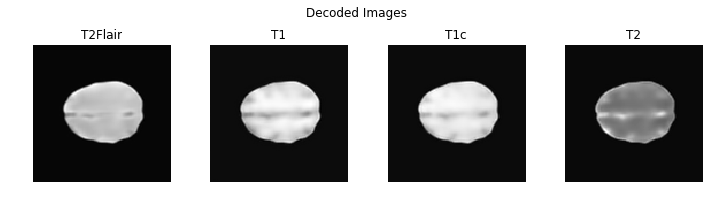

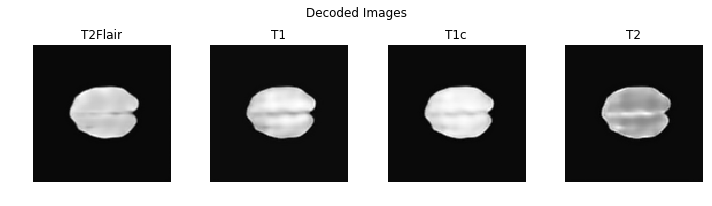

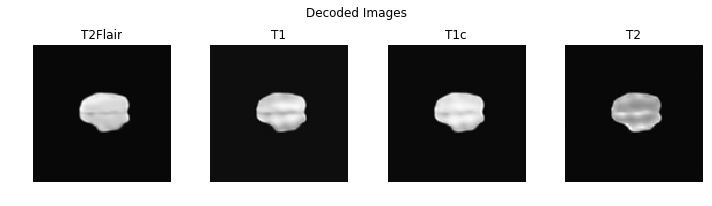

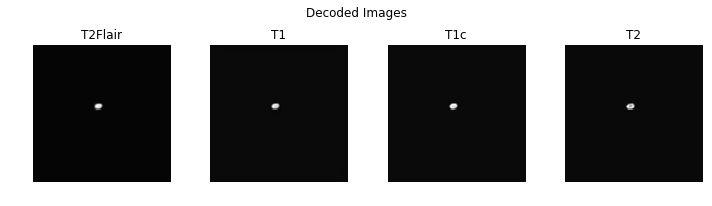

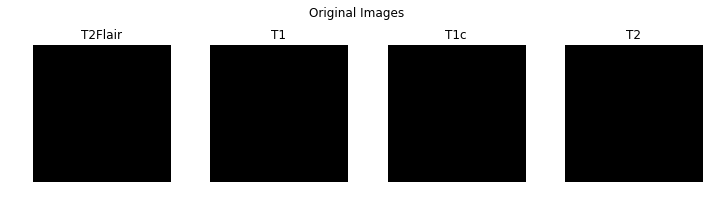

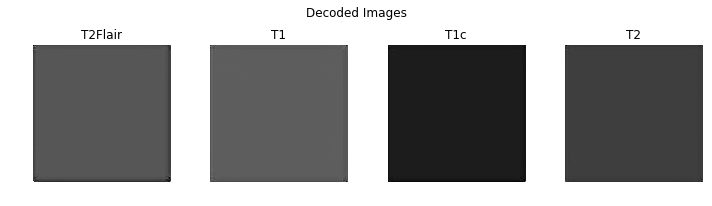

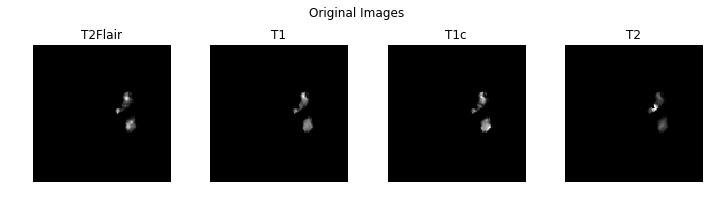

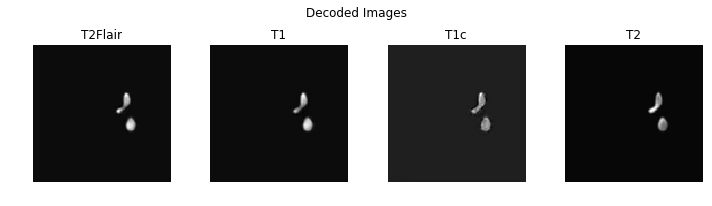

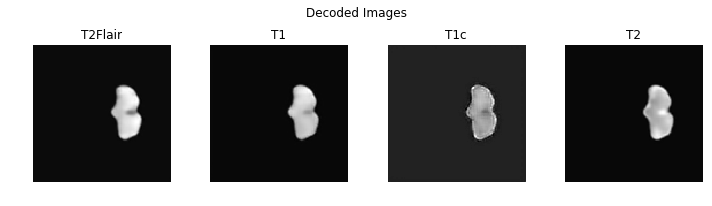

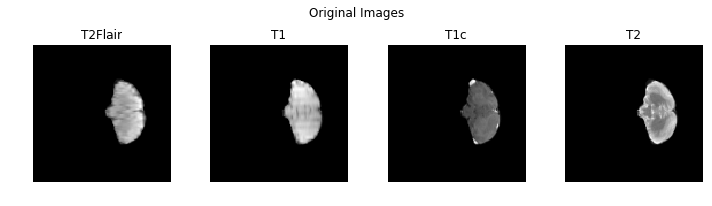

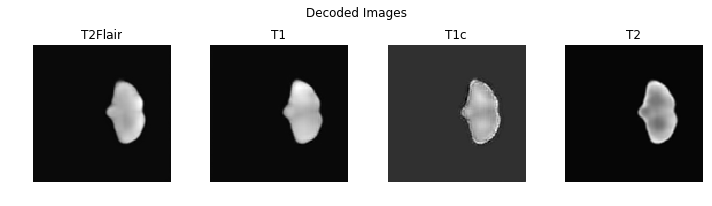

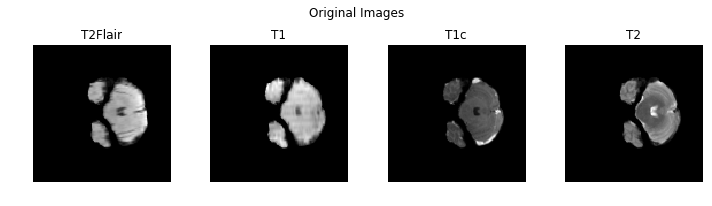

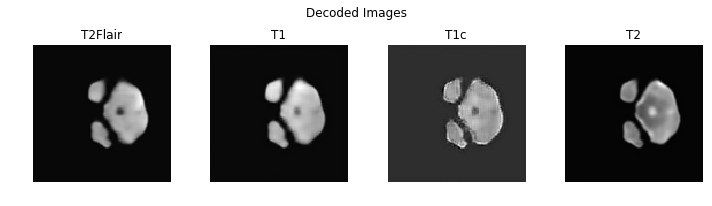

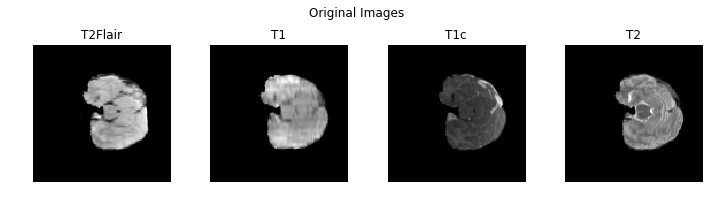

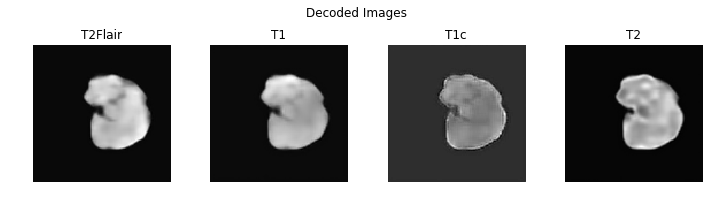

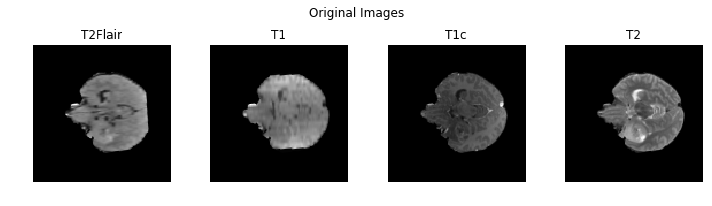

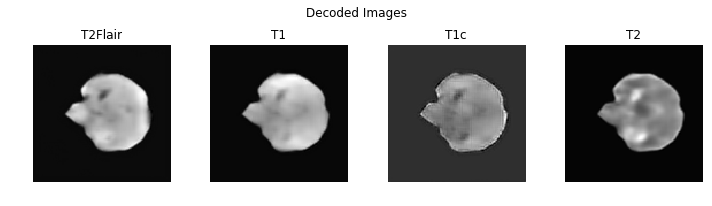

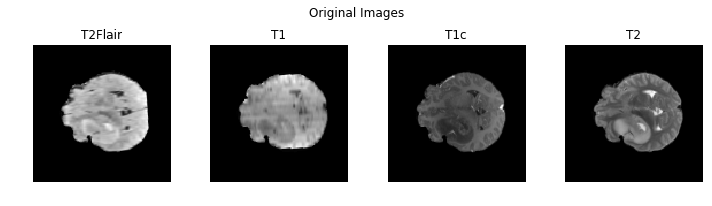

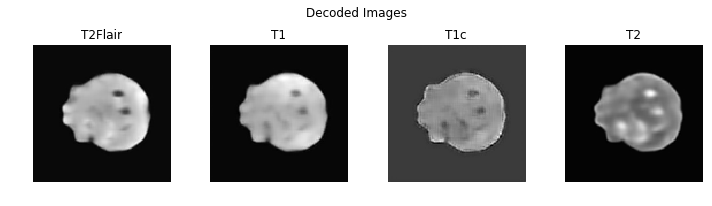

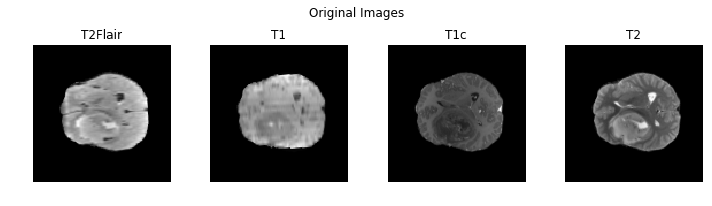

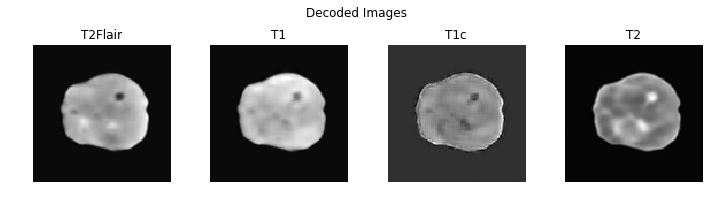

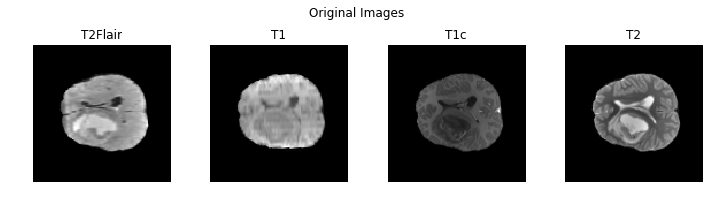

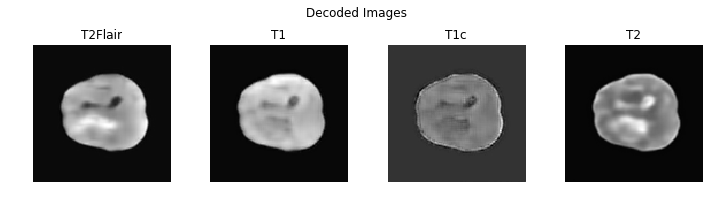

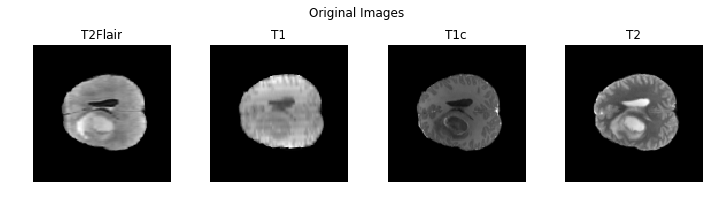

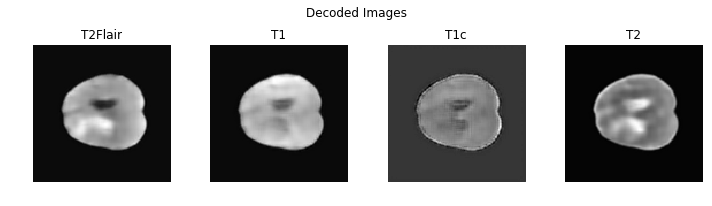

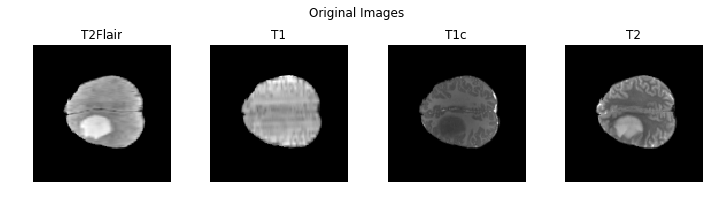

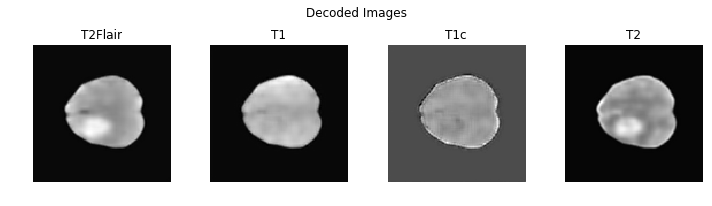

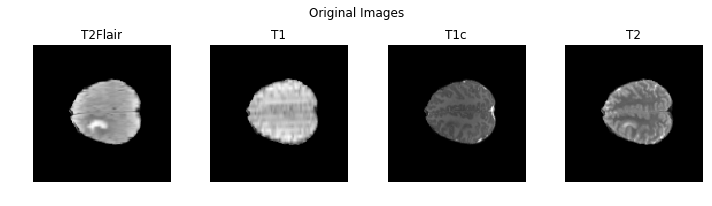

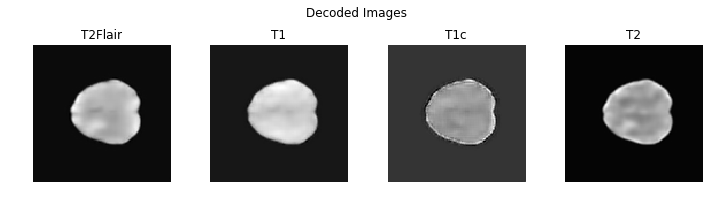

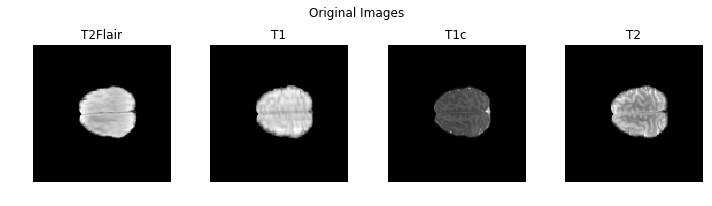

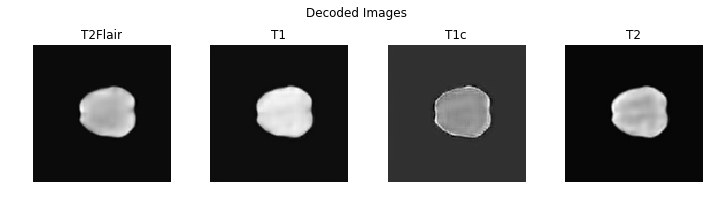

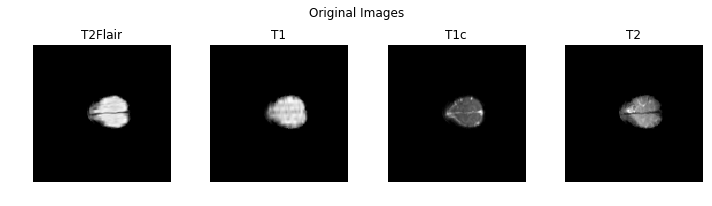

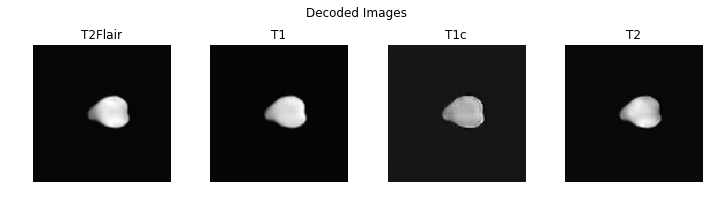

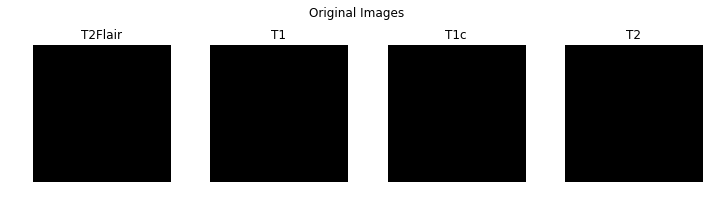

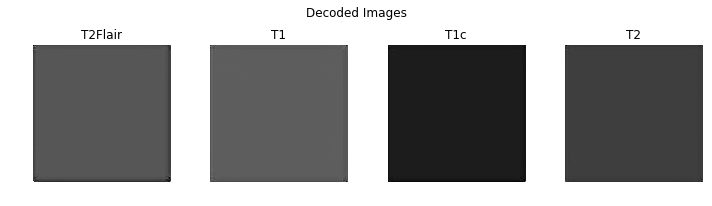

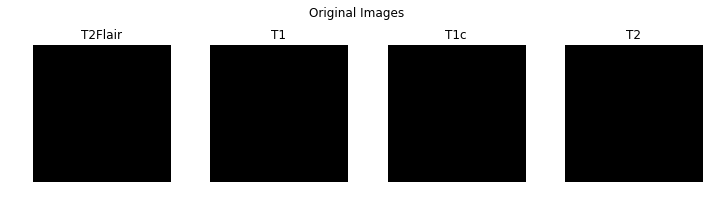

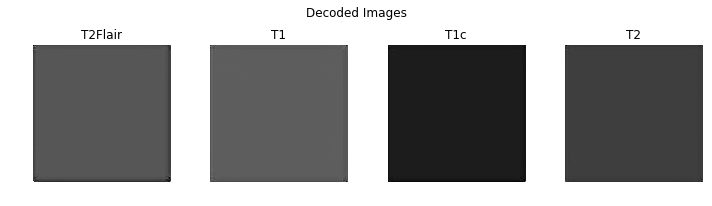

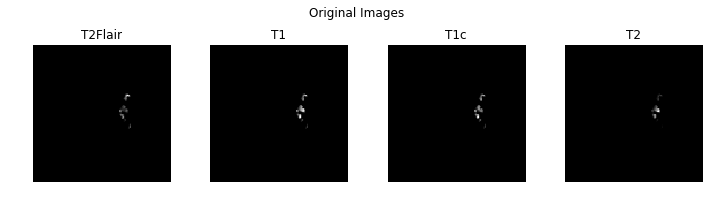

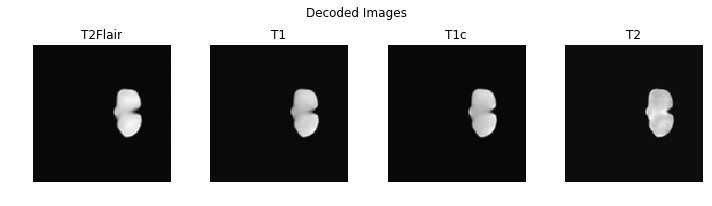

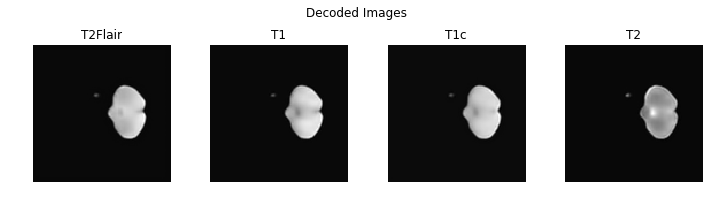

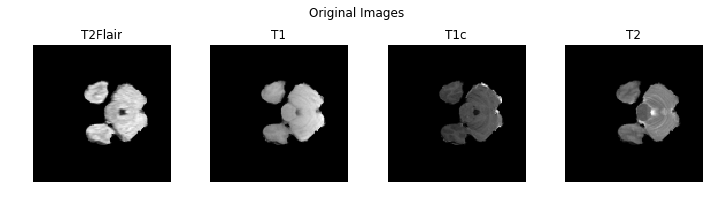

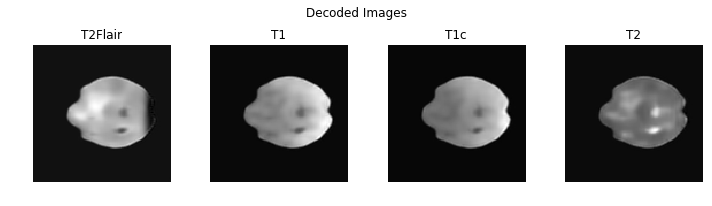

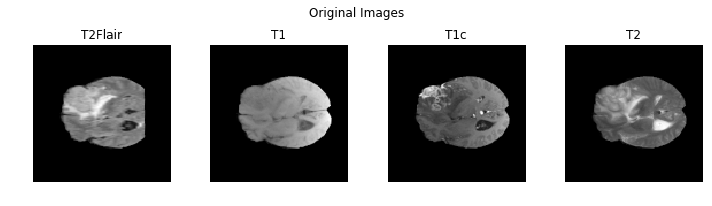

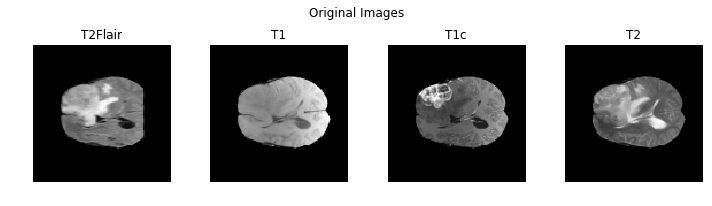

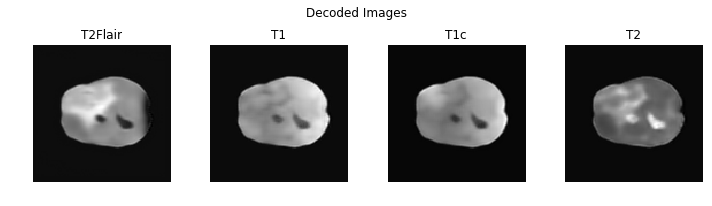

In [16]:
dl.visualizeReconstruction(images_rs, decoded_imgs)